In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import rc
rc('figure', figsize=(15, 5))

1) Try adding previous months max, previous 5 months sum and previous 12 months average shop wise
2) Try adding correlations within item categories, shop ids and between them  

In [2]:
sales_train = pd.read_csv(r'F:\Old_Desktop\Machine Learning Projects\Time Series\sales_train_v2.csv')
items = pd.read_csv(r'F:\Old_Desktop\Machine Learning Projects\Time Series\items.csv')
item_categories = pd.read_csv(r'F:\Old_Desktop\Machine Learning Projects\Time Series\item_categories.csv')
shops = pd.read_csv(r'F:\Old_Desktop\Machine Learning Projects\Time Series\shops.csv')
sales_test = pd.read_csv(r'F:\Old_Desktop\Machine Learning Projects\Time Series\test.csv')

In [3]:
by_month = pd.pivot_table(sales_train, index= ('item_id','shop_id'), values='item_cnt_day', columns='date_block_num',aggfunc = sum)
by_month[by_month.isnull()] = 0
by_month = by_month.reset_index()

In [4]:
by_month = by_month.join(items.loc[:,('item_id','item_category_id')].set_index('item_id'), on='item_id')

In [7]:
by_month.sort_values('shop_id').head()

item_id  shop_id    0    1    2    3    4    5    6    7  \
216727    11861        0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
362622    18820        0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
84152      5022        0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
150155     8481        0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
270802    14456        0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

              ...          25   26   27   28   29   30   31   32   33  \
216727        ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
362622        ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
84152         ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
150155        ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
270802        ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        item_category_id  
216727                63  
362622                40  
84152                 55  
150155                43  
270802                40  

[5 rows x 37 columns]

In [19]:
by_month_shopid_max = by_month.groupby('shop_id').max(axis = 0)

In [22]:
by_month_shopid_max

item_id      0      1      2      3      4      5      6      7  \
shop_id                                                                    
0          22160   39.0   67.0    0.0    0.0    0.0    0.0    0.0    0.0   
1          22154   35.0   54.0    0.0    0.0    0.0    0.0    0.0    0.0   
2          22168   17.0    8.0   22.0    7.0   10.0   43.0   18.0   38.0   
3          22167   11.0   14.0   17.0   12.0   24.0   46.0   56.0   44.0   
4          22167   33.0   30.0   47.0   14.0   26.0   43.0   23.0   35.0   
5          22167    0.0   10.0   16.0   14.0   24.0   76.0   60.0   36.0   
6          22167   45.0   93.0  198.0   59.0  107.0  226.0  157.0  180.0   
7          22167   31.0   31.0   75.0   15.0   50.0  100.0  109.0  108.0   
8          22151   15.0   15.0   17.0    0.0    0.0    0.0    0.0    0.0   
9          22102    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10         22167   19.0   28.0   50.0   10.0   36.0   39.0   45.0   59.0   
11         22164    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12         22168   62.0   79.0   81.0   72.0   63.0  463.0   34.0  375.0   
13         22167   42.0   54.0   20.0   17.0   50.0   68.0   54.0   36.0   
14         22167   28.0   40.0   61.0   18.0  130.0  184.0  169.0  182.0   
15         22167   49.0   79.0   89.0   31.0   87.0  102.0   92.0   81.0   
16         22168   28.0   44.0   62.0   26.0  145.0  244.0  205.0  181.0   
17         22167    0.0    0.0    0.0    0.0    0.0   66.0   52.0   68.0   
18         22167   45.0   43.0  140.0   35.0  243.0  268.0  213.0  111.0   
19         22167   36.0   42.0   85.0   32.0  127.0  134.0  101.0  135.0   
20         22102    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
21         22167   26.0   51.0   45.0   23.0   33.0  121.0  102.0  140.0   
22         22167   46.0   55.0   88.0   66.0  184.0  188.0  168.0  203.0   
23         22160   29.0   43.0   59.0   32.0    0.0    0.0    0.0    0.0   
24         22167   33.0   32.0   47.0   21.0   74.0  183.0  116.0   84.0   
25         22169  125.0   95.0  218.0  104.0  131.0  766.0  575.0  607.0   
26         22167   30.0   52.0  105.0   46.0  101.0  164.0  120.0  158.0   
27         22167   91.0   58.0  105.0   62.0   79.0   39.0  271.0  270.0   
28         22167  169.0   73.0  101.0   90.0  504.0  634.0  540.0  641.0   
29         22167   35.0   54.0   77.0   39.0  156.0  177.0  173.0  113.0   
30         22167   27.0   32.0   66.0   39.0   82.0  225.0  186.0  223.0   
31         22167  116.0  117.0  259.0  175.0  384.0  763.0  799.0  820.0   
32         22155   20.0   21.0   70.0   20.0   49.0  126.0    6.0    0.0   
33         22167    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
34         22167    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
35         22167   26.0   30.0   52.0   57.0  195.0  162.0  130.0  128.0   
36         22102    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
37         22167   30.0   35.0   69.0   23.0   39.0  184.0   53.0   98.0   
38         22167   21.0   37.0   70.0   23.0   51.0   74.0   77.0   78.0   
39         22167    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
40         22145    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
41         22167   18.0   29.0   29.0   21.0  143.0  181.0  172.0  163.0   
42         22168   55.0   79.0  185.0   66.0  111.0  453.0  311.0  374.0   
43         22168   64.0   59.0  115.0   61.0   76.0  143.0  116.0  136.0   
44         22167   32.0   20.0   77.0   31.0   39.0   74.0   58.0   55.0   
45         22167   42.0   33.0   54.0   28.0   80.0  124.0   81.0   60.0   
46         22167   52.0   48.0   95.0   38.0  216.0  257.0  221.0  277.0   
47         22167   31.0   29.0   42.0   39.0  126.0  138.0   93.0  114.0   
48         22167    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49         22167    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50         22167   42.0   33.0  106.0   35.0   51.0  239.

In [25]:
months = np.arange(0,34)

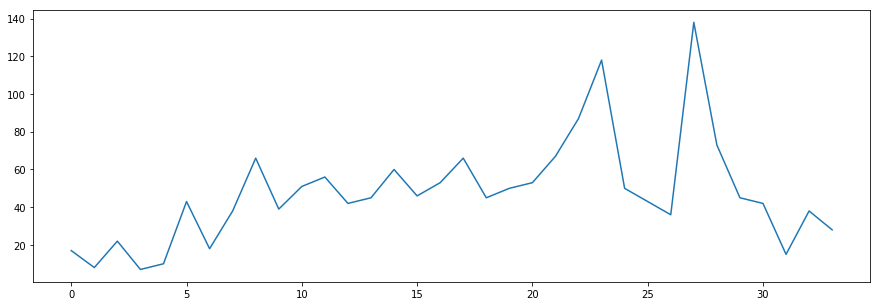

In [36]:
plt.plot(by_month_shopid_max.loc[2,months])

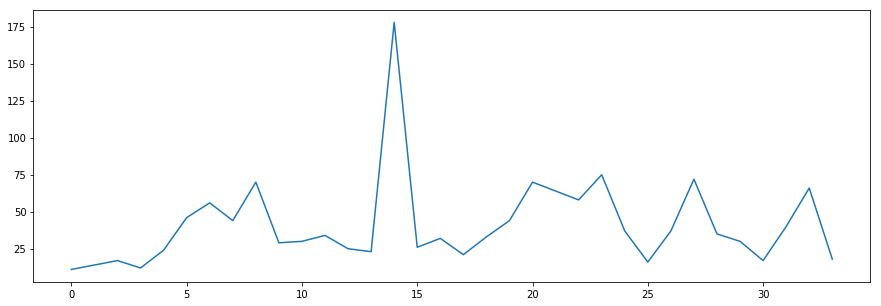

In [37]:
plt.plot(by_month_shopid_max.loc[3,months])

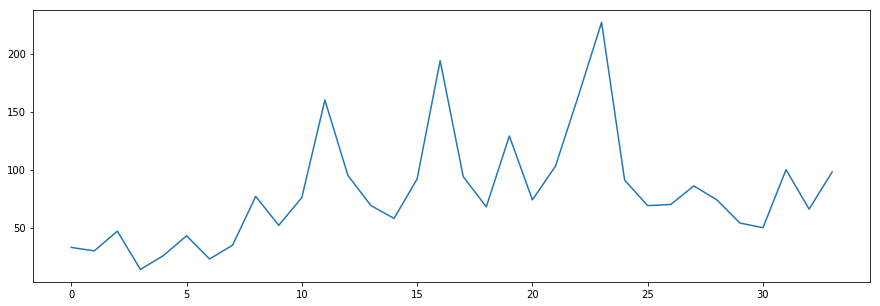

In [38]:
plt.plot(by_month_shopid_max.loc[4,months])

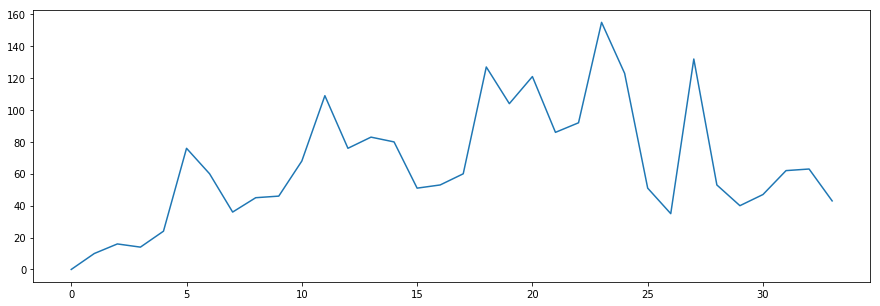

In [39]:
plt.plot(by_month_shopid_max.loc[5,months])

In [44]:
by_month_shopid_max_corr = by_month_shopid_max.loc[:,months].corr()

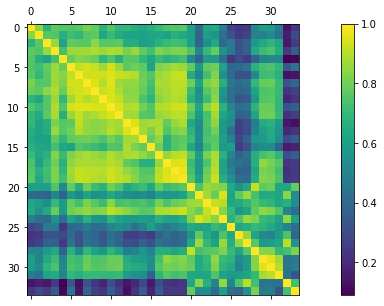

In [46]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_shopid_max_corr)
fig.colorbar(cax)

In [47]:
by_month_shopid_sum_corr = by_month.groupby('shop_id').sum(axis = 0).loc[:,months].corr()

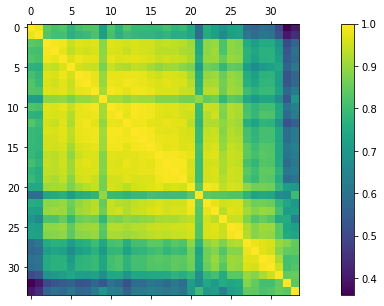

In [48]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_shopid_sum_corr)
fig.colorbar(cax)

In [50]:
by_month_shopid_item_count = by_month.groupby('shop_id')['item_id'].count()

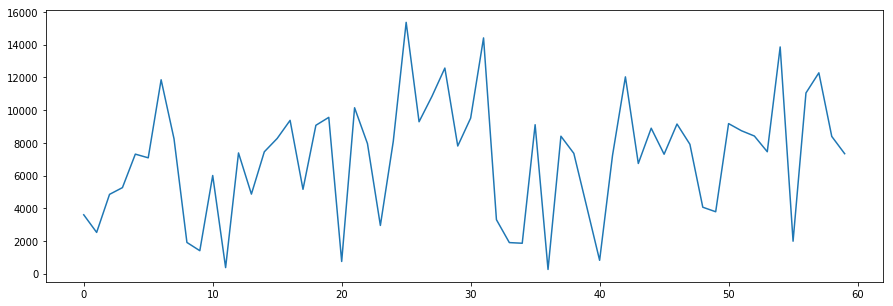

In [51]:
plt.plot(by_month_shopid_item_count)

In [136]:
by_month_shopid_average = by_month.groupby('shop_id').sum(axis = 0).divide(by_month_shopid_item_count, axis = 0).loc[:,months] 

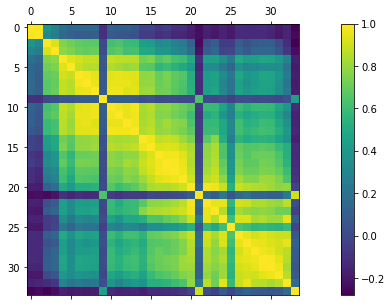

In [137]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_shopid_average.corr())
fig.colorbar(cax)

In [65]:
by_month_itcat_max = by_month.groupby('item_category_id').max(axis = 0)

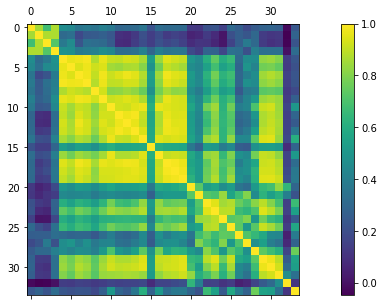

In [67]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_max.loc[:,months].corr())
fig.colorbar(cax)

In [68]:
by_month_itcat_sum = by_month.groupby('item_category_id').sum(axis = 0)

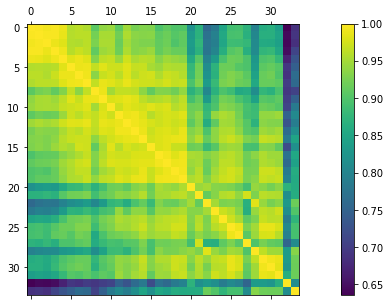

In [69]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_sum.loc[:,months].corr())
fig.colorbar(cax)

In [124]:
by_month_itcat_item_count = by_month.groupby('item_category_id')['item_id'].count()

In [126]:
by_month_itcat_average = by_month.groupby('item_category_id').sum(axis = 0).divide(by_month_itcat_item_count, axis = 0).loc[:,months] 

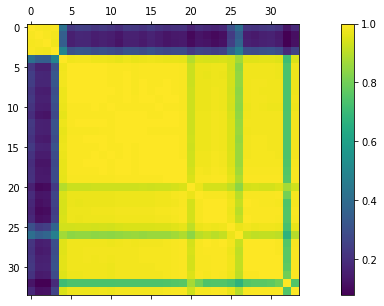

In [117]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_average.corr())
fig.colorbar(cax)

In [82]:
by_month_itcatshop_max = by_month.groupby(by = ('shop_id', 'item_category_id')).max(axis = 0)

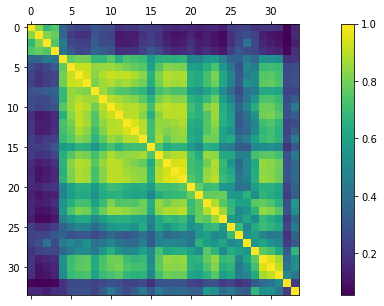

In [83]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcatshop_max.loc[:,months].corr())
fig.colorbar(cax)

In [84]:
by_month_itcatshop_sum = by_month.groupby(by = ('shop_id', 'item_category_id')).sum(axis = 0)

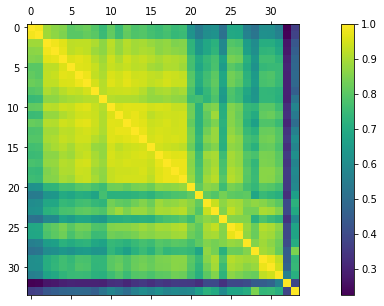

In [85]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcatshop_sum.loc[:,months].corr())
fig.colorbar(cax)

In [86]:
by_month_itcatshop_item_count = by_month.groupby(by = ('shop_id', 'item_category_id'))['item_id'].count()

In [87]:
by_month_itcatshop_average = by_month.groupby(by = ('shop_id', 'item_category_id')).sum(axis = 0).divide(by_month_itcatshop_item_count, axis = 0).loc[:,months] 

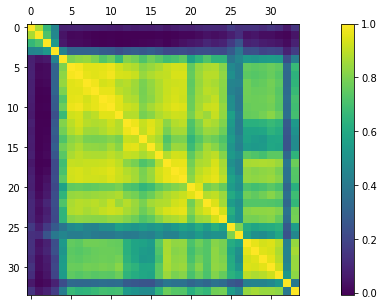

In [88]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcatshop_average.corr())
fig.colorbar(cax)

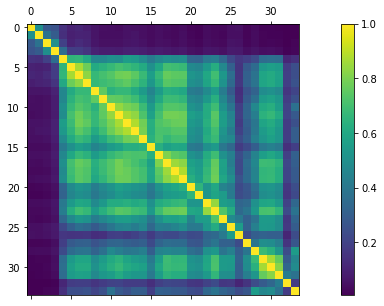

In [89]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month.loc[:,months].corr())
fig.colorbar(cax)

In [ ]:
by_month.loc[:,months].corr()

In [90]:
items.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [92]:
items.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

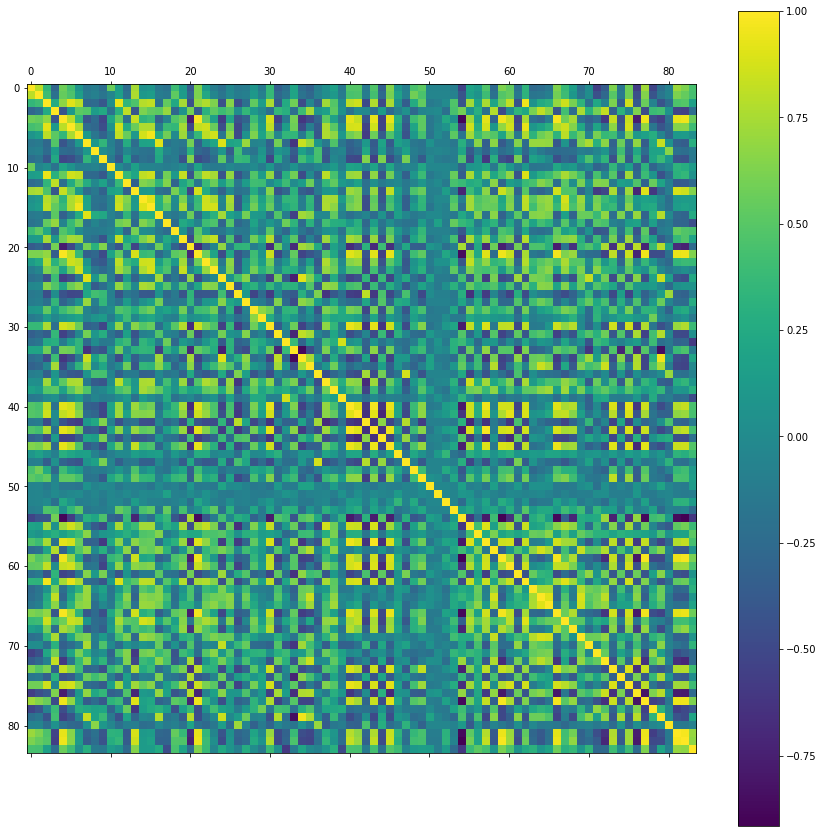

In [105]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_sum.loc[:,months].T.corr())
fig.colorbar(cax)

In [133]:
by_month_itcat_sum_corr = by_month_itcat_sum.loc[:,months].T.corr()

In [134]:
(abs(by_month_itcat_sum_corr)>0.9).sum(axis = 0)-1

item_category_id
0      0
1      0
2      3
3      0
4     10
5      2
6      1
7      2
8      0
9      0
10     0
11     1
12     0
13     1
14     1
15     2
16     1
17     0
18     0
19     0
20     0
21    10
22     0
23     0
24     2
25     0
26     0
27     0
28     0
29     0
      ..
54     2
55     0
56     0
57     4
58     0
59     7
60     1
61     0
62     3
63     0
64     1
65     1
66     8
67     1
68     0
69     0
70     0
71     0
72     0
73     1
74     0
75     2
76     0
77     8
78     0
79     1
80     0
81     6
82     7
83     0
Length: 84, dtype: int64

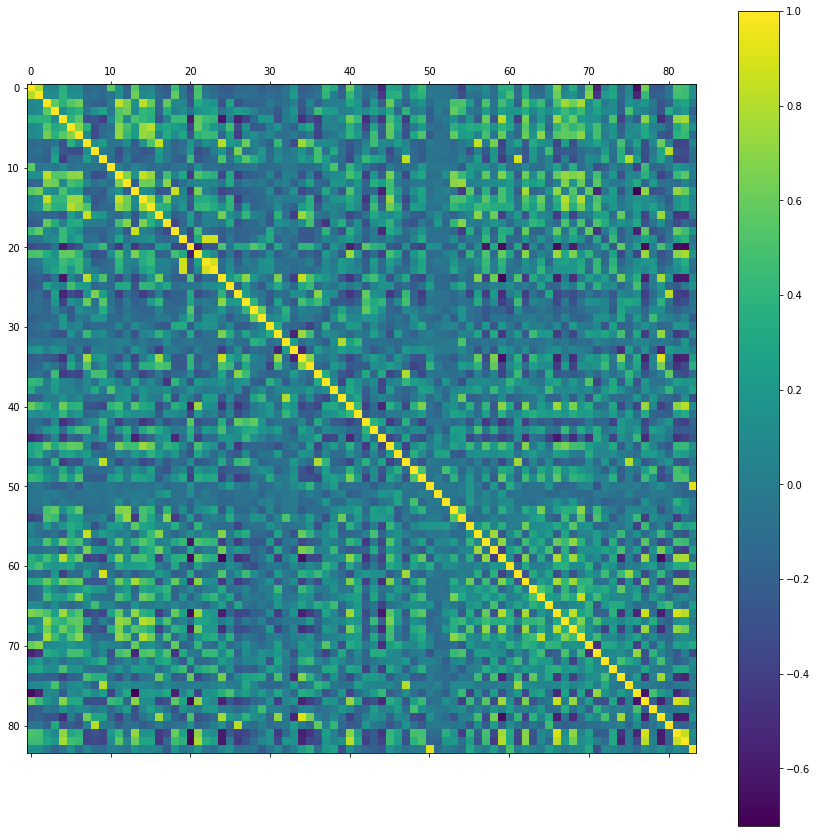

In [112]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_max.loc[:,months].T.corr())
fig.colorbar(cax)

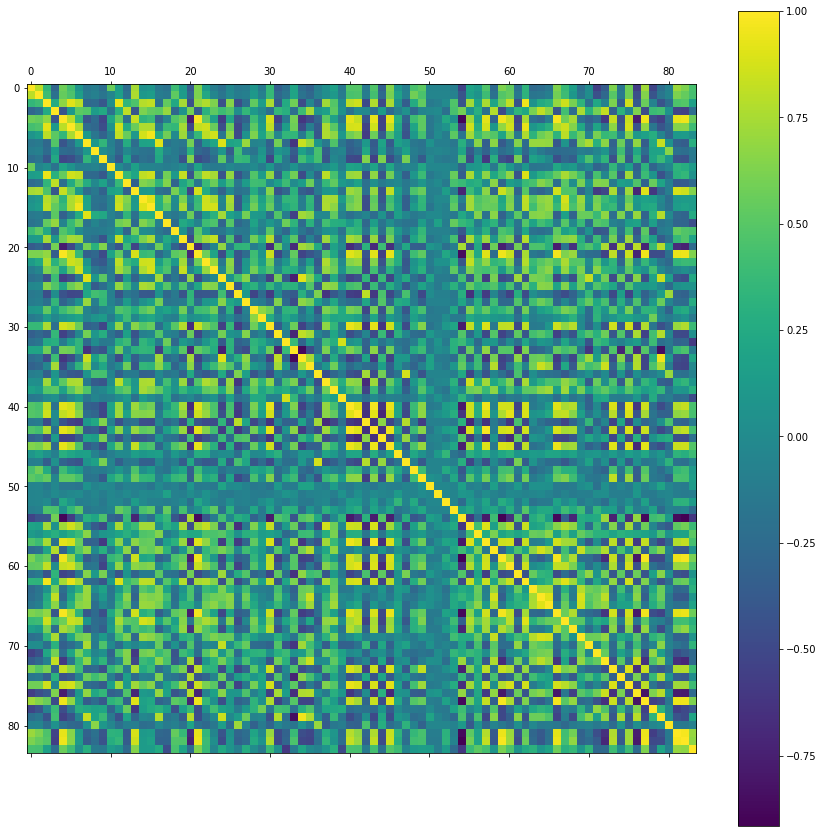

In [128]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_average.loc[:,months].T.corr())
fig.colorbar(cax)

In [130]:
(abs(by_month_itcat_average.loc[:,months].T.corr())>0.9).sum(axis = 0)-1

item_category_id
0      0
1      0
2      3
3      0
4     10
5      2
6      1
7      2
8      0
9      0
10     0
11     1
12     0
13     1
14     1
15     2
16     1
17     0
18     0
19     0
20     0
21    10
22     0
23     0
24     2
25     0
26     0
27     0
28     0
29     0
      ..
54     2
55     0
56     0
57     4
58     0
59     7
60     1
61     0
62     3
63     0
64     1
65     1
66     8
67     1
68     0
69     0
70     0
71     0
72     0
73     1
74     0
75     2
76     0
77     8
78     0
79     1
80     0
81     6
82     7
83     0
Length: 84, dtype: int64

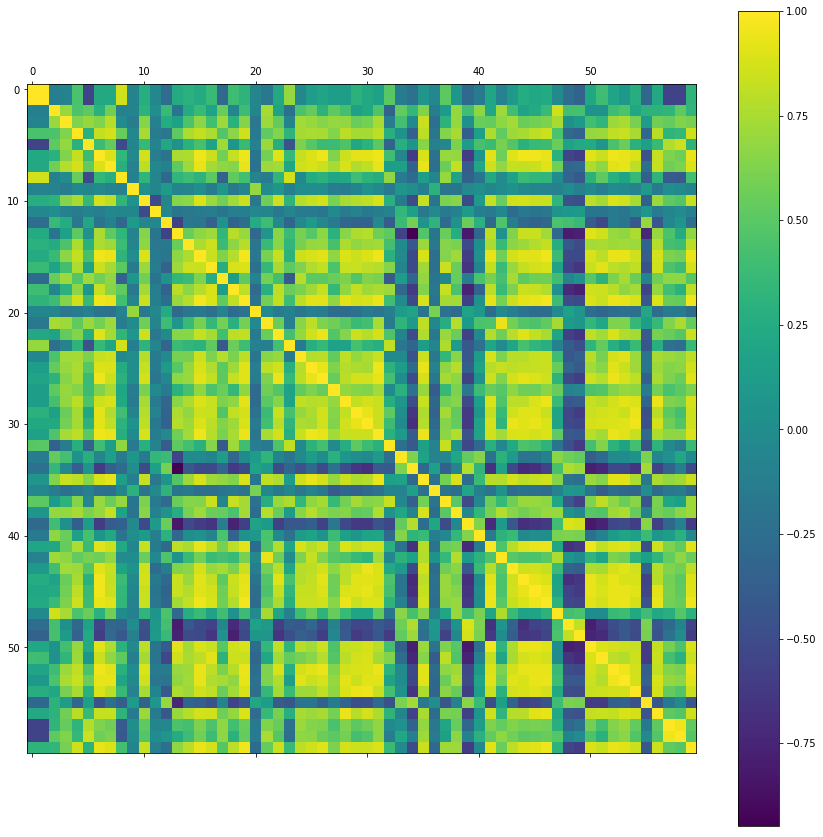

In [139]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_shopid_average.loc[:,months].T.corr())
fig.colorbar(cax)

In [140]:
(abs(by_month_shopid_average.loc[:,months].T.corr())>0.9).sum(axis = 0)-1

shop_id
0      1
1      1
2      0
3      0
4      0
5      0
6     16
7      7
8      0
9      0
10     0
11     0
12     0
13     2
14     0
15    12
16     1
17     0
18     0
19    14
20     0
21     1
22     3
23     0
24     1
25     5
26     9
27     0
28     4
29     5
30     7
31     9
32     0
33     0
34     1
35     5
36     0
37     0
38     0
39     0
40     0
41    10
42     1
43     3
44    11
45    14
46    12
47     0
48     0
49     0
50     6
51     1
52    14
53    15
54     3
55     0
56     3
57     1
58     1
59     9
dtype: int64

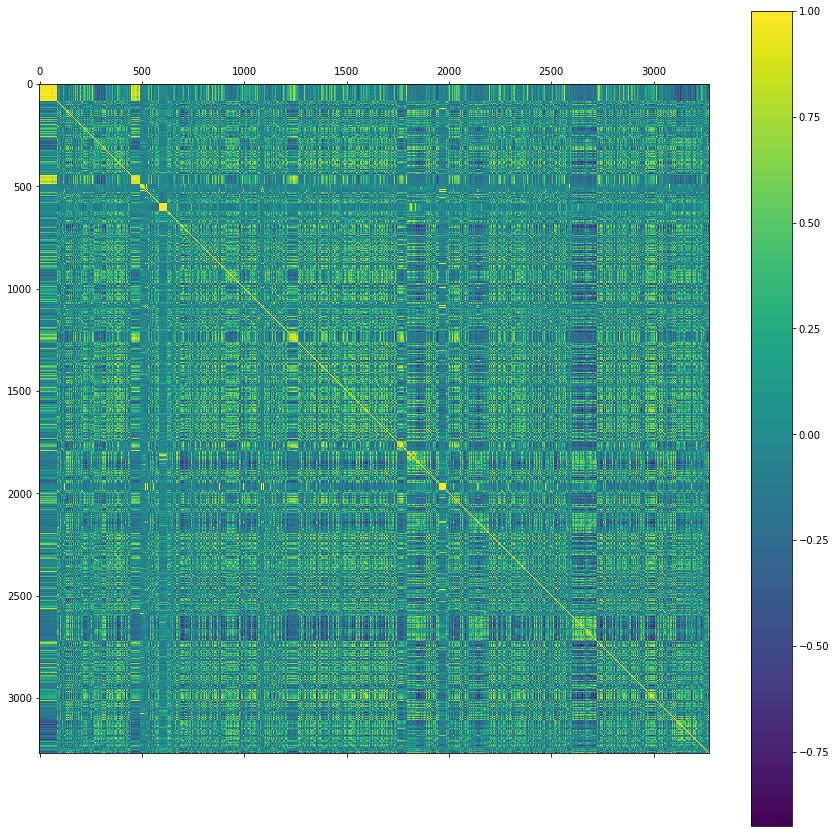

In [142]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcatshop_average.loc[:,months].T.corr())
fig.colorbar(cax)

In [147]:
((abs(by_month_itcatshop_average.loc[:,months].T.corr())>0.9).sum(axis = 0)-1)

shop_id  item_category_id
0        0                   29
         1                   29
         2                   90
         3                   90
         4                   97
         5                   95
         6                   95
         11                  86
         13                  92
         14                  88
         15                  53
         19                  92
         21                  90
         22                  87
         23                  97
         25                  88
         28                  92
         29                  93
         30                  90
         33                  43
         35                  83
         37                  91
         38                  94
         40                  92
         41                  90
         43                  95
         45                  84
         49                  89
         55                  92
         56                  74
              